In [ ]:
# Mounts Google Drive to Google Colab.
# Enabling Access to Google Drive Files for Reading & Editing Functions.
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import all Necessary Libraries needed for Data Cleansing & Model Training Process.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Import the Dataset.
# Import Correct Dataset "mentalhealth.csv".
DATA_DIR_1 = "/content/mentalhealth.csv.csv"
df = pd.read_csv (DATA_DIR_1, header=0)

In [ ]:
# Acquire the Dataset.
# Number of Rows & Columns, "len(df)"".
print("Print number of rows    : {}".format(len(df)))
print("Print number of columns : {}".format(len(df.columns)))
print()

# Listing all Columns, "len(df.columns)".
print("Listing all columns: ")
print(df.head())
print()

# Finding the Basic Statistics of All Column, "describe()".
print("Display basic statistic of all columns: ")
print(df.describe())
print()

# Listing the Basic Information of the Columns, "info()".
print("Display basic information of the columns: ")
print(df.info())

Print number of rows    : 53047
Print number of columns : 3

Listing all columns: 
  Unnamed: 0                                          statement   status
0          0                                         oh my gosh  Anxiety
1          1  trouble sleeping, confused mind, restless hear...  Anxiety
2          2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3          3  I've shifted my focus to something else but I'...  Anxiety
4          4  I'm restless and restless, it's been a month n...  Anxiety

Display basic statistic of all columns: 
       Unnamed: 0          statement  status
count       53044              52681   53016
unique      53044              51069       7
top         53042  what do you mean?  Normal
freq            1                 22   16348

Display basic information of the columns: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53047 entries, 0 to 53046
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ---

In [ ]:
# Identifying Missing Values.
# Cancel Line Nnumber Ellipsis.
pd.set_option("display.max_rows", None)
# Cancel Column Number Ellipsis.
pd.set_option("display.max_columns", None)
# Avoid Line Breaks.
pd.set_option("display.expand_frame_repr", False)

missing_values = df.isnull()
missing_positions = missing_values.stack()[missing_values.stack() == True]
print("\nRows and Columns with Missing Values:")
print(missing_positions)


Rows and Columns with Missing Values:
6      status        True
7      status        True
8      status        True
293    statement     True
572    statement     True
595    statement     True
1539   statement     True
2448   statement     True
2470   statement     True
2753   statement     True
4331   statement     True
5878   statement     True
6513   statement     True
8995   status        True
8996   status        True
8997   status        True
8998   status        True
9001   status        True
9156   status        True
9157   status        True
9158   status        True
9159   status        True
13293  status        True
13294  Unnamed: 0    True
       statement     True
       status        True
13295  Unnamed: 0    True
       statement     True
       status        True
13296  Unnamed: 0    True
       statement     True
       status        True
13297  statement     True
       status        True
36377  statement     True
36897  statement     True
37396  status        True

In [ ]:
# Identifying Sum of Missing Values.
print (df.isnull().sum())

Unnamed: 0      3
statement     366
status         31
dtype: int64


In [ ]:
# Handling Missing Values.
# Remove Unnamed Column (Repeated Index).
df = df.drop(columns=["Unnamed: 0"])
# "Fillna()" Function to Impute & Replace Missing Value.
# Fill Missing Values ​​in "statement" Column with "Unknown".
df['statement'] = df['statement'].fillna("Unknown")

# Calculate the Mode.
most_frequent_status = df['status'].mode()[0]
# Fill Missing Values ​​in the "status" Column with the Mode.
# Replace with "mode" for Categorical Data.
df['status'] = df['status'].fillna(most_frequent_status)

print(df.isnull().sum())

statement    0
status       0
dtype: int64


In [ ]:
# Attach the Clean Dataset to the Final Report.
cleaned_file_path = "mentalhealth..csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved as {cleaned_file_path}")

from google.colab import files
files.download("mentalhealth..csv")


Cleaned dataset saved as mentalhealth..csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_csv("clean_mentalhealth.csv", index=False)
from google.colab import files
# "files.download("clean_classified_mentalhealth.csv")".


Status Categories and Their Counts:
status
Personality disorder     1199
Stress                   2669
Bipolar                  2873
Anxiety                  3881
Suicidal                10647
Depression              15399
Normal                  16379
Name: count, dtype: int64


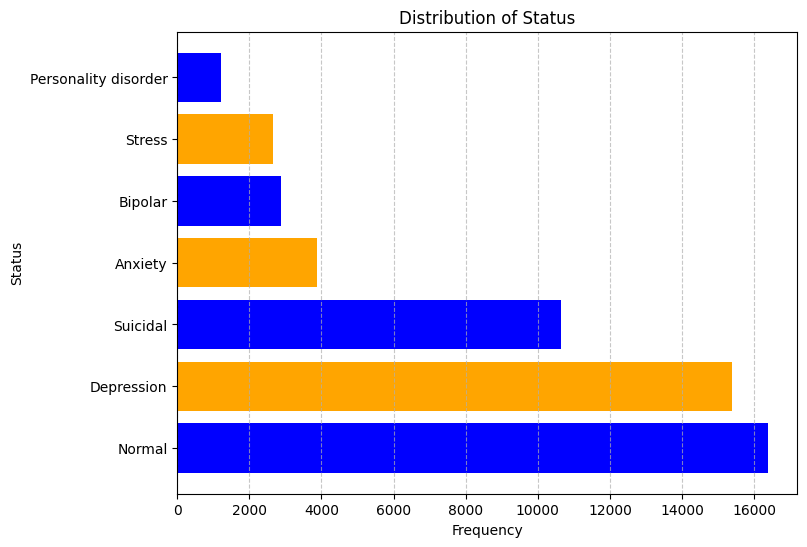

In [ ]:
# Identify Status Attributes Categories & Count How Many Of Them Are in Each Category.
# Count the Number of Occurrences of each Category in the Status Column & Sort in Ascendingly Order.
# "sort_values(ascending=True)" Function help to Rank Answer Ascendingly.
status_counts = df['status'].value_counts().sort_values(ascending=True)

print("\nStatus Categories and Their Counts:")
print(status_counts)

plt.figure(figsize=(8, 6))
plt.barh(status_counts.index[::-1], status_counts.values[::-1], color=['blue', 'orange'])
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.title('Distribution of Status')
# Add Grid for Better Readability.
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Make the Status into Binary Classification only (Normal & Depression).
df['status'] = df['status'].apply(lambda x: 'Depression' if x in ['Suicidal', 'Depression', 'Personality disorder', 'Stress', 'Bipolar', 'Anxiety'] else 'Normal')

# Count the Number of Categories after Conversion.
status_counts = df['status'].value_counts()

print("\nBinary Classification (Normal vs. Depression):")
print(status_counts)


Binary Classification (Normal vs. Depression):
status
Depression    36668
Normal        16379
Name: count, dtype: int64


In [ ]:
# Encoding by using Label Encoder.
label_encoder = LabelEncoder()

df['status'] = label_encoder.fit_transform(df['status'])
print(df.head()) # Check first Five Data Rows.

print(df.loc[33054]) # Check the Row at Index 33054.

                                           statement  status
0                                         oh my gosh       0
1  trouble sleeping, confused mind, restless hear...       0
2  All wrong, back off dear, forward doubt. Stay ...       0
3  I've shifted my focus to something else but I'...       0
4  I'm restless and restless, it's been a month n...       0
statement    i'm looking in the newspaper for a job.
status                                             1
Name: 33054, dtype: object


In [ ]:
df.to_csv("binary_classified_mentalhealth.csv", index=False)
from google.colab import files
# "files.download("binary_classified_mentalhealth.csv")".

In [ ]:
import pandas as pd

# Load the Cleaned Dataset.
mentalhealth_df = pd.read_csv("binary_classified_mentalhealth.csv")
# Display First Few Rows.
mentalhealth_df.head()

,statement,status
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless hear...",0
2,"All wrong, back off dear, forward doubt. Stay ...",0
3,I've shifted my focus to something else but I'...,0
4,"I'm restless and restless, it's been a month n...",0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define Independent (X) & Dependent (y) Variables.
X = mentalhealth_df['statement'] # Independent Variable (Text Data).
y = mentalhealth_df['status'] # Dependent Variable (0 = Depression, 1 = Normal).

# Convert Text into TF-IDF Vectors.
vectorizer = TfidfVectorizer(max_features=5000) # Limit Features for Efficiency.
X_tfidf = vectorizer.fit_transform(X)

# Check Shape of Transformed Data.
print(f"TF-IDF Transformed Data Shape: {X_tfidf.shape}")

TF-IDF Transformed Data Shape: (53047, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

# Perform 80-20 Split with Stratification.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Display Dataset Sizes using Shape[0] to get the Number of Rows (Samples).
print(f"Training set size: {X_train.shape[0]} samples") # Changed len(X_train) to X_train.shape[0].
print(f"Testing set size: {X_test.shape[0]} samples") # Changed len(X_test) to X_test.shape[0].

Training set size: 42437 samples
Testing set size: 10610 samples


In [ ]:
# Display Number of Depression & Normal Values in Training Ddata.
print(y_train.value_counts())
# Display Number of Depression & Normal Values in Testing Data.
print(y_test.value_counts())

status
0    29334
1    13103
Name: count, dtype: int64
status
0    7334
1    3276
Name: count, dtype: int64


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute Accuracy.
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"✅ Decision Tree Accuracy: {accuracy_dt:.4f}")

# Print Classification Report.
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Print Confusion Matrix.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

✅ Decision Tree Accuracy: 0.9092
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7334
           1       0.85      0.86      0.85      3276

    accuracy                           0.91     10610
   macro avg       0.89      0.89      0.89     10610
weighted avg       0.91      0.91      0.91     10610

Confusion Matrix:
 [[6841  493]
 [ 470 2806]]


In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize improved Neural Network Model.
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,), # Increase Nurons.
    solver='adam', # Change from SGD to Adam (Better Convergence).
    max_iter=500, # Increase Iterations for Better Learning.
    alpha=0.001, # Add L2 Regularization to Reduce Overfitting.
    random_state=42,
    verbose=True # Show Training Progress.
)

# Train the Model.
nn_model.fit(X_train, y_train)
# Predict on Test Data.
y_pred_nn = nn_model.predict(X_test)

Iteration 1, loss = 0.30571070
Iteration 2, loss = 0.13580635
Iteration 3, loss = 0.11040909
Iteration 4, loss = 0.09847633
Iteration 5, loss = 0.09045169
Iteration 6, loss = 0.08502776
Iteration 7, loss = 0.08066179
Iteration 8, loss = 0.07682373
Iteration 9, loss = 0.07342226
Iteration 10, loss = 0.07034845
Iteration 11, loss = 0.06722400
Iteration 12, loss = 0.06476371
Iteration 13, loss = 0.06229161
Iteration 14, loss = 0.05983502
Iteration 15, loss = 0.05687499
Iteration 16, loss = 0.05496054
Iteration 17, loss = 0.05266540
Iteration 18, loss = 0.05074822
Iteration 19, loss = 0.04854368
Iteration 20, loss = 0.04650013
Iteration 21, loss = 0.04412542
Iteration 22, loss = 0.04263771
Iteration 23, loss = 0.04055362
Iteration 24, loss = 0.03863377
Iteration 25, loss = 0.03709030
Iteration 26, loss = 0.03533752
Iteration 27, loss = 0.03387790
Iteration 28, loss = 0.03244433
Iteration 29, loss = 0.03097170
Iteration 30, loss = 0.03002415
Iteration 31, loss = 0.02844973
Iteration 32, los

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute Accuracy.
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"✅ Neural Network Accuracy: {accuracy_nn:.4f}")

# Print Classification Report.
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# Print Confusion Matrix.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

✅ Neural Network Accuracy: 0.9484
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7334
           1       0.91      0.93      0.92      3276

    accuracy                           0.95     10610
   macro avg       0.94      0.94      0.94     10610
weighted avg       0.95      0.95      0.95     10610

Confusion Matrix:
 [[7016  318]
 [ 230 3046]]


In [ ]:
# Display Accuracy Comparison.
print(f"📊 Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"📊 Neural Network Accuracy: {accuracy_nn:.4f}")

# Determine the Best Model.
if accuracy_nn > accuracy_dt:
    print("🚀 Neural Network performed better.")
else:

    print("✅ Decision Tree performed better.")

📊 Decision Tree Accuracy: 0.9092
📊 Neural Network Accuracy: 0.9484
🚀 Neural Network performed better.


Decision Tree Performance:
Accuracy: 0.9092
Precision: 0.8506
Recall: 0.8565

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7334
           1       0.85      0.86      0.85      3276

    accuracy                           0.91     10610
   macro avg       0.89      0.89      0.89     10610
weighted avg       0.91      0.91      0.91     10610

Confusion Matrix:
[[6841  493]
 [ 470 2806]]


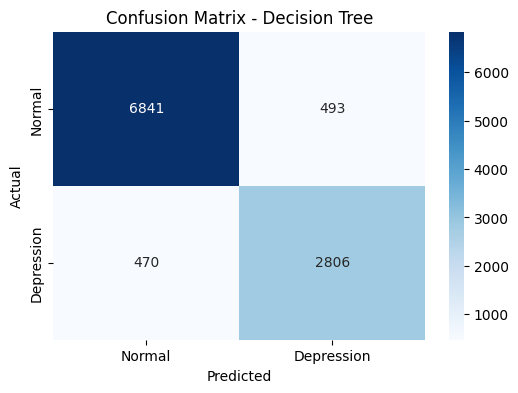

Neural Network Performance:
Accuracy: 0.9484
Precision: 0.9055
Recall: 0.9298

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7334
           1       0.91      0.93      0.92      3276

    accuracy                           0.95     10610
   macro avg       0.94      0.94      0.94     10610
weighted avg       0.95      0.95      0.95     10610

Confusion Matrix:
[[7016  318]
 [ 230 3046]]


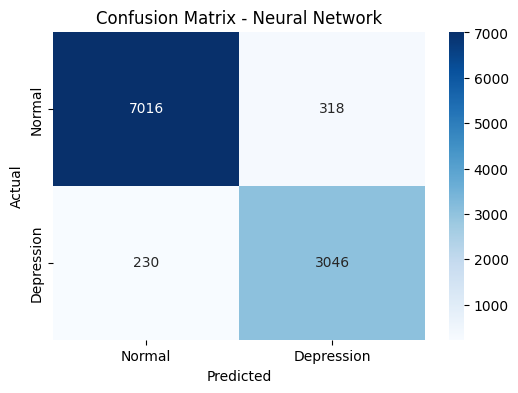

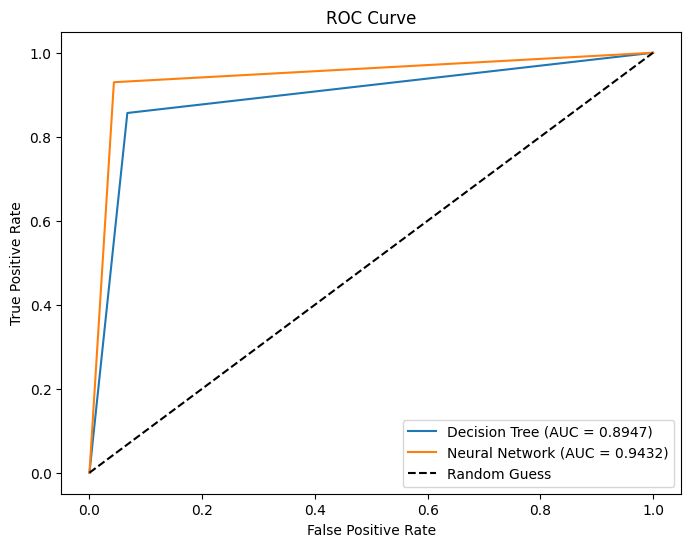

In [24]:
# Part A: Model Performance.
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot Confusion Matrix.
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Depression"], yticklabels=["Normal", "Depression"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Part B: ROC Curve.
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

# Evaluate Models.
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_nn, "Neural Network")

# ROC Curves.
plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_pred_dt, "Decision Tree")
plot_roc_curve(y_test, y_pred_nn, "Neural Network")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# 1. Define your New Test Statements.
test_statements = [
    "I can't stop worrying about everything",
    "I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled",
    "Even the smallest things feel like too much right now",
    "I can’t stop smiling",
    "Today has been amazing!",
]

# 2. Transform the New Statements using the Fitted TF-IDF Vectorizer.
X_test_new_tfidf = vectorizer.transform(test_statements)

# 3. Predict using the Trained Decision Tree Model.
predictions_dt = dt_model.predict(X_test_new_tfidf)

# 4. Interpret the Predictions (Assuming 1 = Normal, 0 = Depression).
label_map = {1: "Normal", 0: "Depression"}
results_dt = [label_map[pred] for pred in predictions_dt]

# 5. Print each Statement with its Predicted Label.
for statement, label in zip(test_statements, results_dt):
    print(f"Statement: {statement}")
    print(f"Predicted Label (Decision Tree): {label}\n")

Statement: I can't stop worrying about everything
Predicted Label (Decision Tree): Depression

Statement: I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled
Predicted Label (Decision Tree): Depression

Statement: Even the smallest things feel like too much right now
Predicted Label (Decision Tree): Normal

Statement: I can’t stop smiling
Predicted Label (Decision Tree): Normal

Statement: Today has been amazing!
Predicted Label (Decision Tree): Normal



In [ ]:
# 1. Predict using the Trained Neural Network Model.
predictions_nn = nn_model.predict(X_test_new_tfidf)

# 2. Interpret the Predictions (Assuming 0 = Depression, 1 = Normal).
label_map = {0: "Depression", 1: "Normal"}
results_nn = [label_map[pred] for pred in predictions_nn]

# 3. Print each Statement with its Predicted Label.
for statement, label in zip(test_statements, results_nn):
    print(f"Statement: {statement}")
    print(f"Predicted Label (neural network): {label}\n")

Statement: I can't stop worrying about everything
Predicted Label (neural network): Depression

Statement: I've been working hard, and seeing the results makes me feel incredibly happy and fulfilled
Predicted Label (neural network): Normal

Statement: Even the smallest things feel like too much right now
Predicted Label (neural network): Normal

Statement: I can’t stop smiling
Predicted Label (neural network): Normal

Statement: Today has been amazing!
Predicted Label (neural network): Normal



In [27]:
# Checking Overfitting.
from sklearn.metrics import roc_auc_score

model = dt_model
model = nn_model

train_preds = model.predict_proba(X_train)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, train_preds)
test_auc = roc_auc_score(y_test, test_preds)

print (f"Train AUC: {train_auc:.4f}")
print (f"Test AUC: {test_auc:.4f}")

Train AUC: 1.0000
Test AUC: 0.9849
